`Employee attrition refers to the lifecycle of your workforce: it is not normally a negative representation of the company. Employees move away, pass away or retire; they could leave to raise a family or go back to school. Regardless, whatever their reason for leaving your company isn’t because they have an issue with you, it is merely a result of life happening.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Data description : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/discussion/86957
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# load data and check samples of it
dataset = pd.read_csv('dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
309,31,No,Travel_Rarely,691,Research & Development,5,4,Technical Degree,1,423,...,3,80,1,6,4,3,5,2,0,3
819,28,No,Travel_Rarely,1451,Research & Development,2,1,Life Sciences,1,1136,...,1,80,0,6,2,1,5,3,0,4
1185,43,No,Travel_Rarely,1291,Research & Development,15,2,Life Sciences,1,1666,...,1,80,1,14,3,3,14,10,6,11
270,55,No,Travel_Rarely,452,Research & Development,1,3,Medical,1,374,...,3,80,0,37,2,3,36,10,4,13
353,37,No,Travel_Rarely,1319,Research & Development,6,3,Medical,1,474,...,1,80,2,13,2,3,7,7,6,7


In [3]:
# show dataset information , using info() function
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
# show dataset statistical info using describe() function
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Always the first step of a data analysis process , is to spend some time with the dataset , to make sure that you understand every feature of it this will help you so much in analysis pipeline

`next step is Exploratory Data Analysis : Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts`

<img src='../../images/EDA.png'>

In [5]:
# explore features values
for column in dataset.columns:
    print(f"{column}: Number of unique values {dataset[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

`We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.`

In [6]:
dataset.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
# get categoraicl and numerical features
categorical_features=[]
numericl_features=[]
for col in dataset.columns:
    if dataset[col].dtypes == object:
        categorical_features.append(col)
    else:
        numericl_features.append(col)

### analysis of categorical features

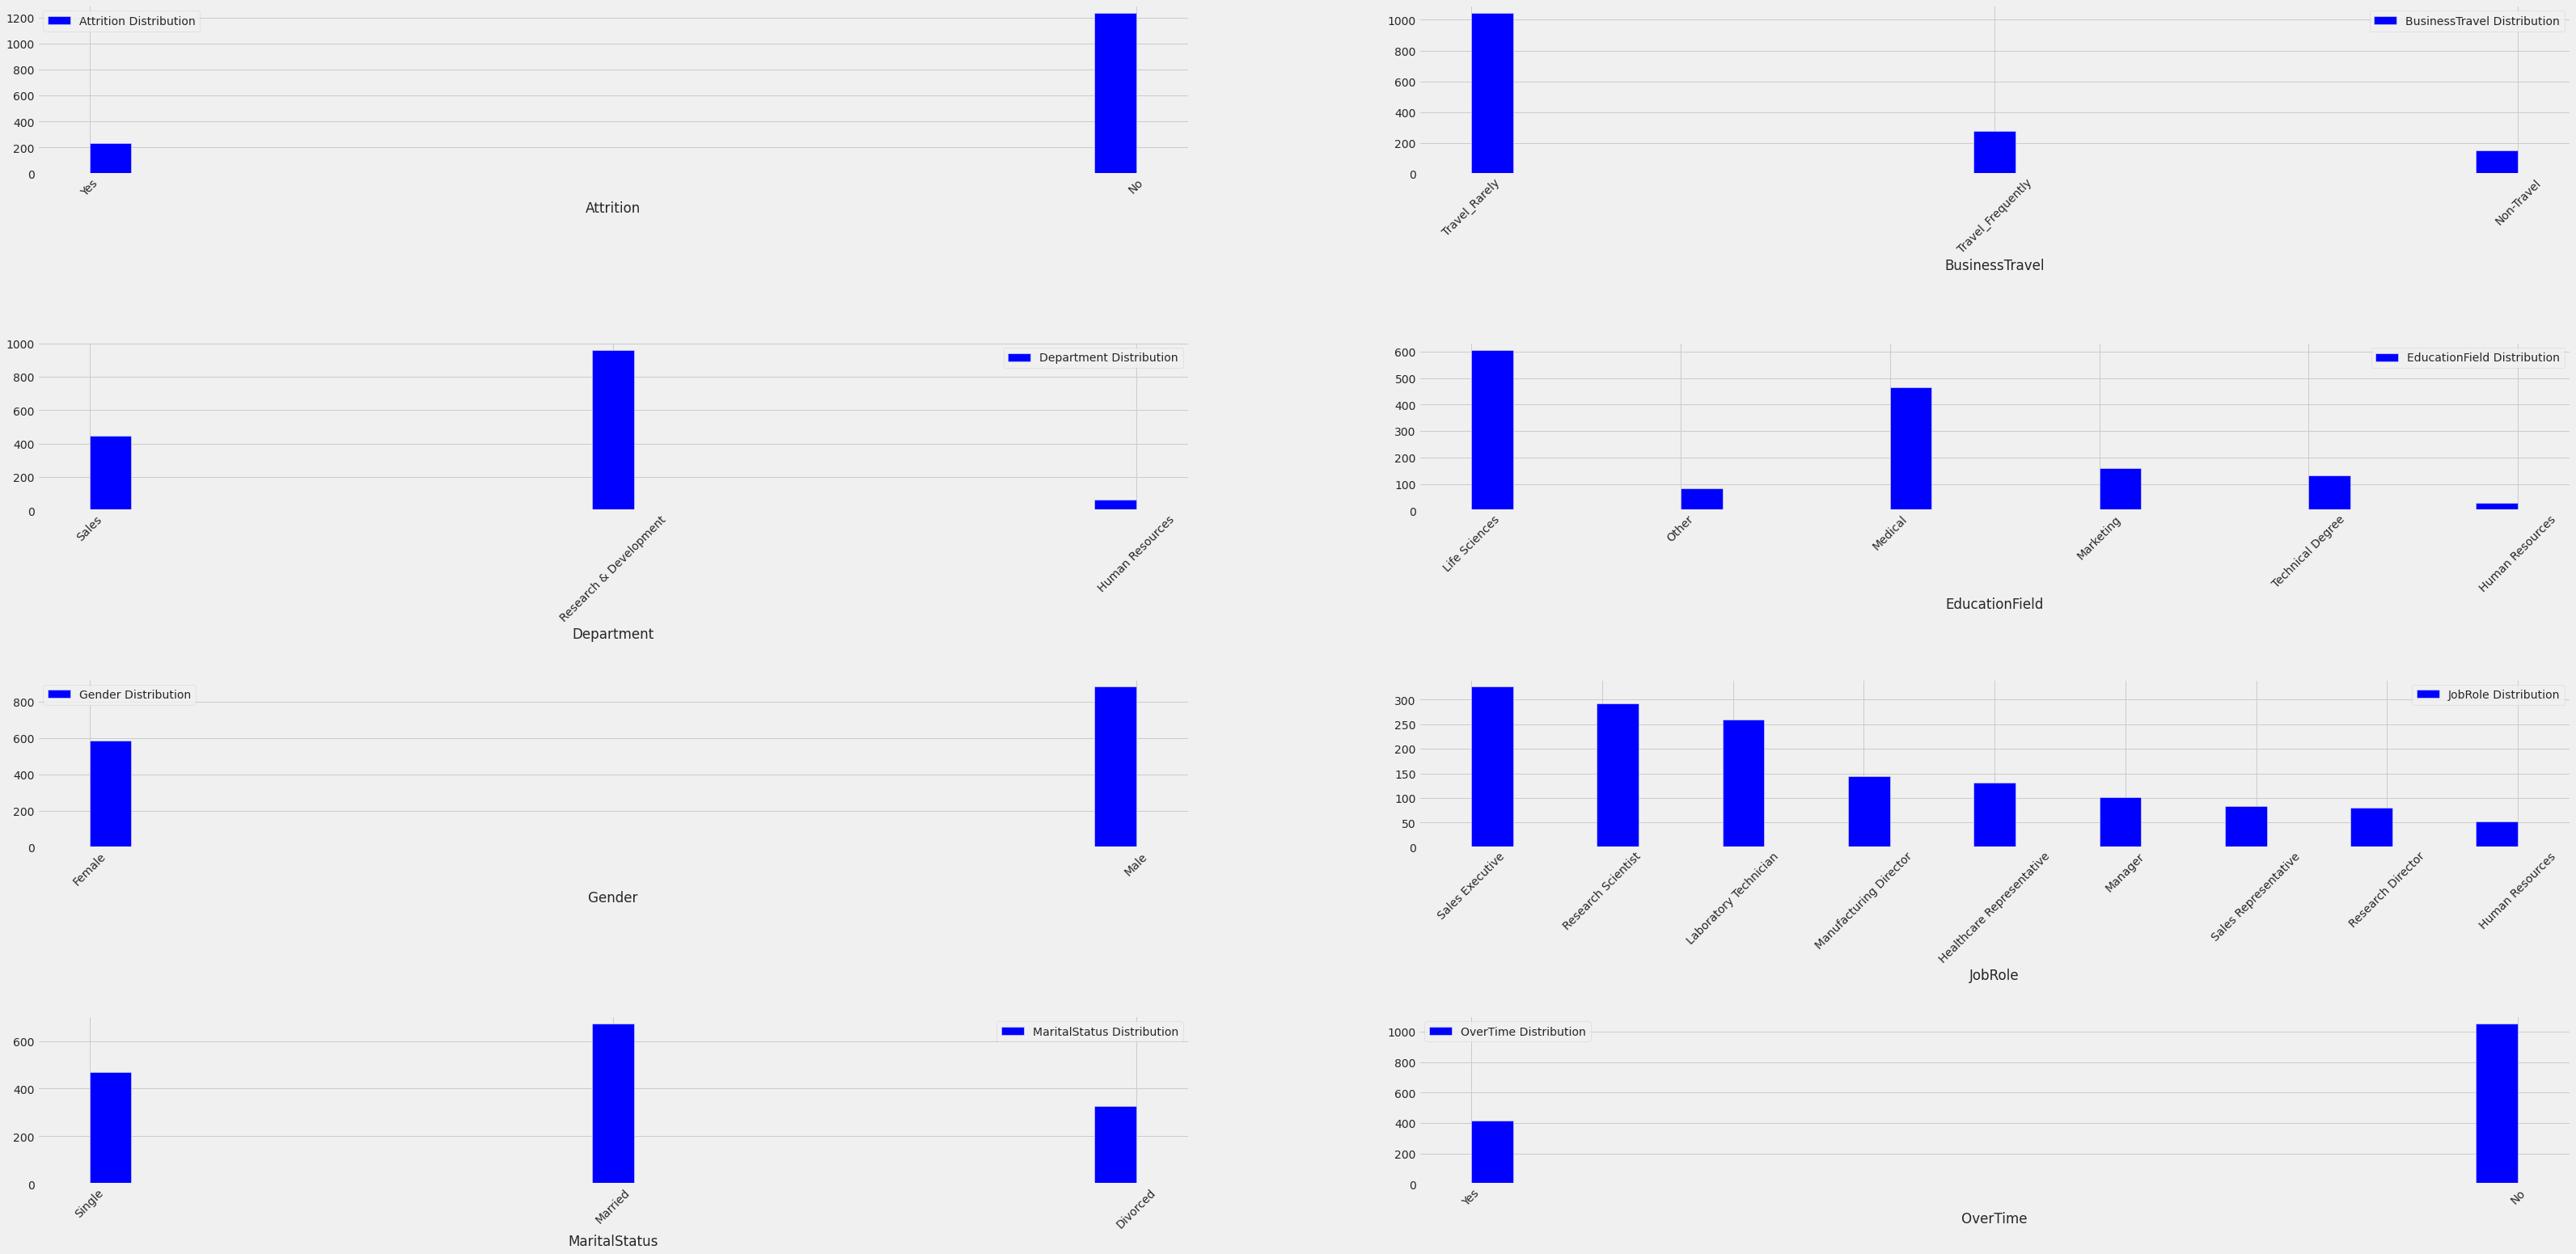

In [54]:
plt.figure(figsize=(50, 25))
# plot distribution of each categoriacl feature
for i, column in enumerate(categorical_features,1):
    plt.subplot(4, 2, i) # 8 plots 4 rows by 2 columns
    dataset[column].hist(bins=25 ,color='blue', label=column+' Distribution') # histogram plot
    plt.legend() # plot legend
    plt.xticks(rotation=45) # rotate x axis labels
    plt.subplots_adjust(hspace=1) # add spaces between plots
    plt.xlabel(column) # put column name in x axis

### what is the relatoin between categorical features and attrition rate ?

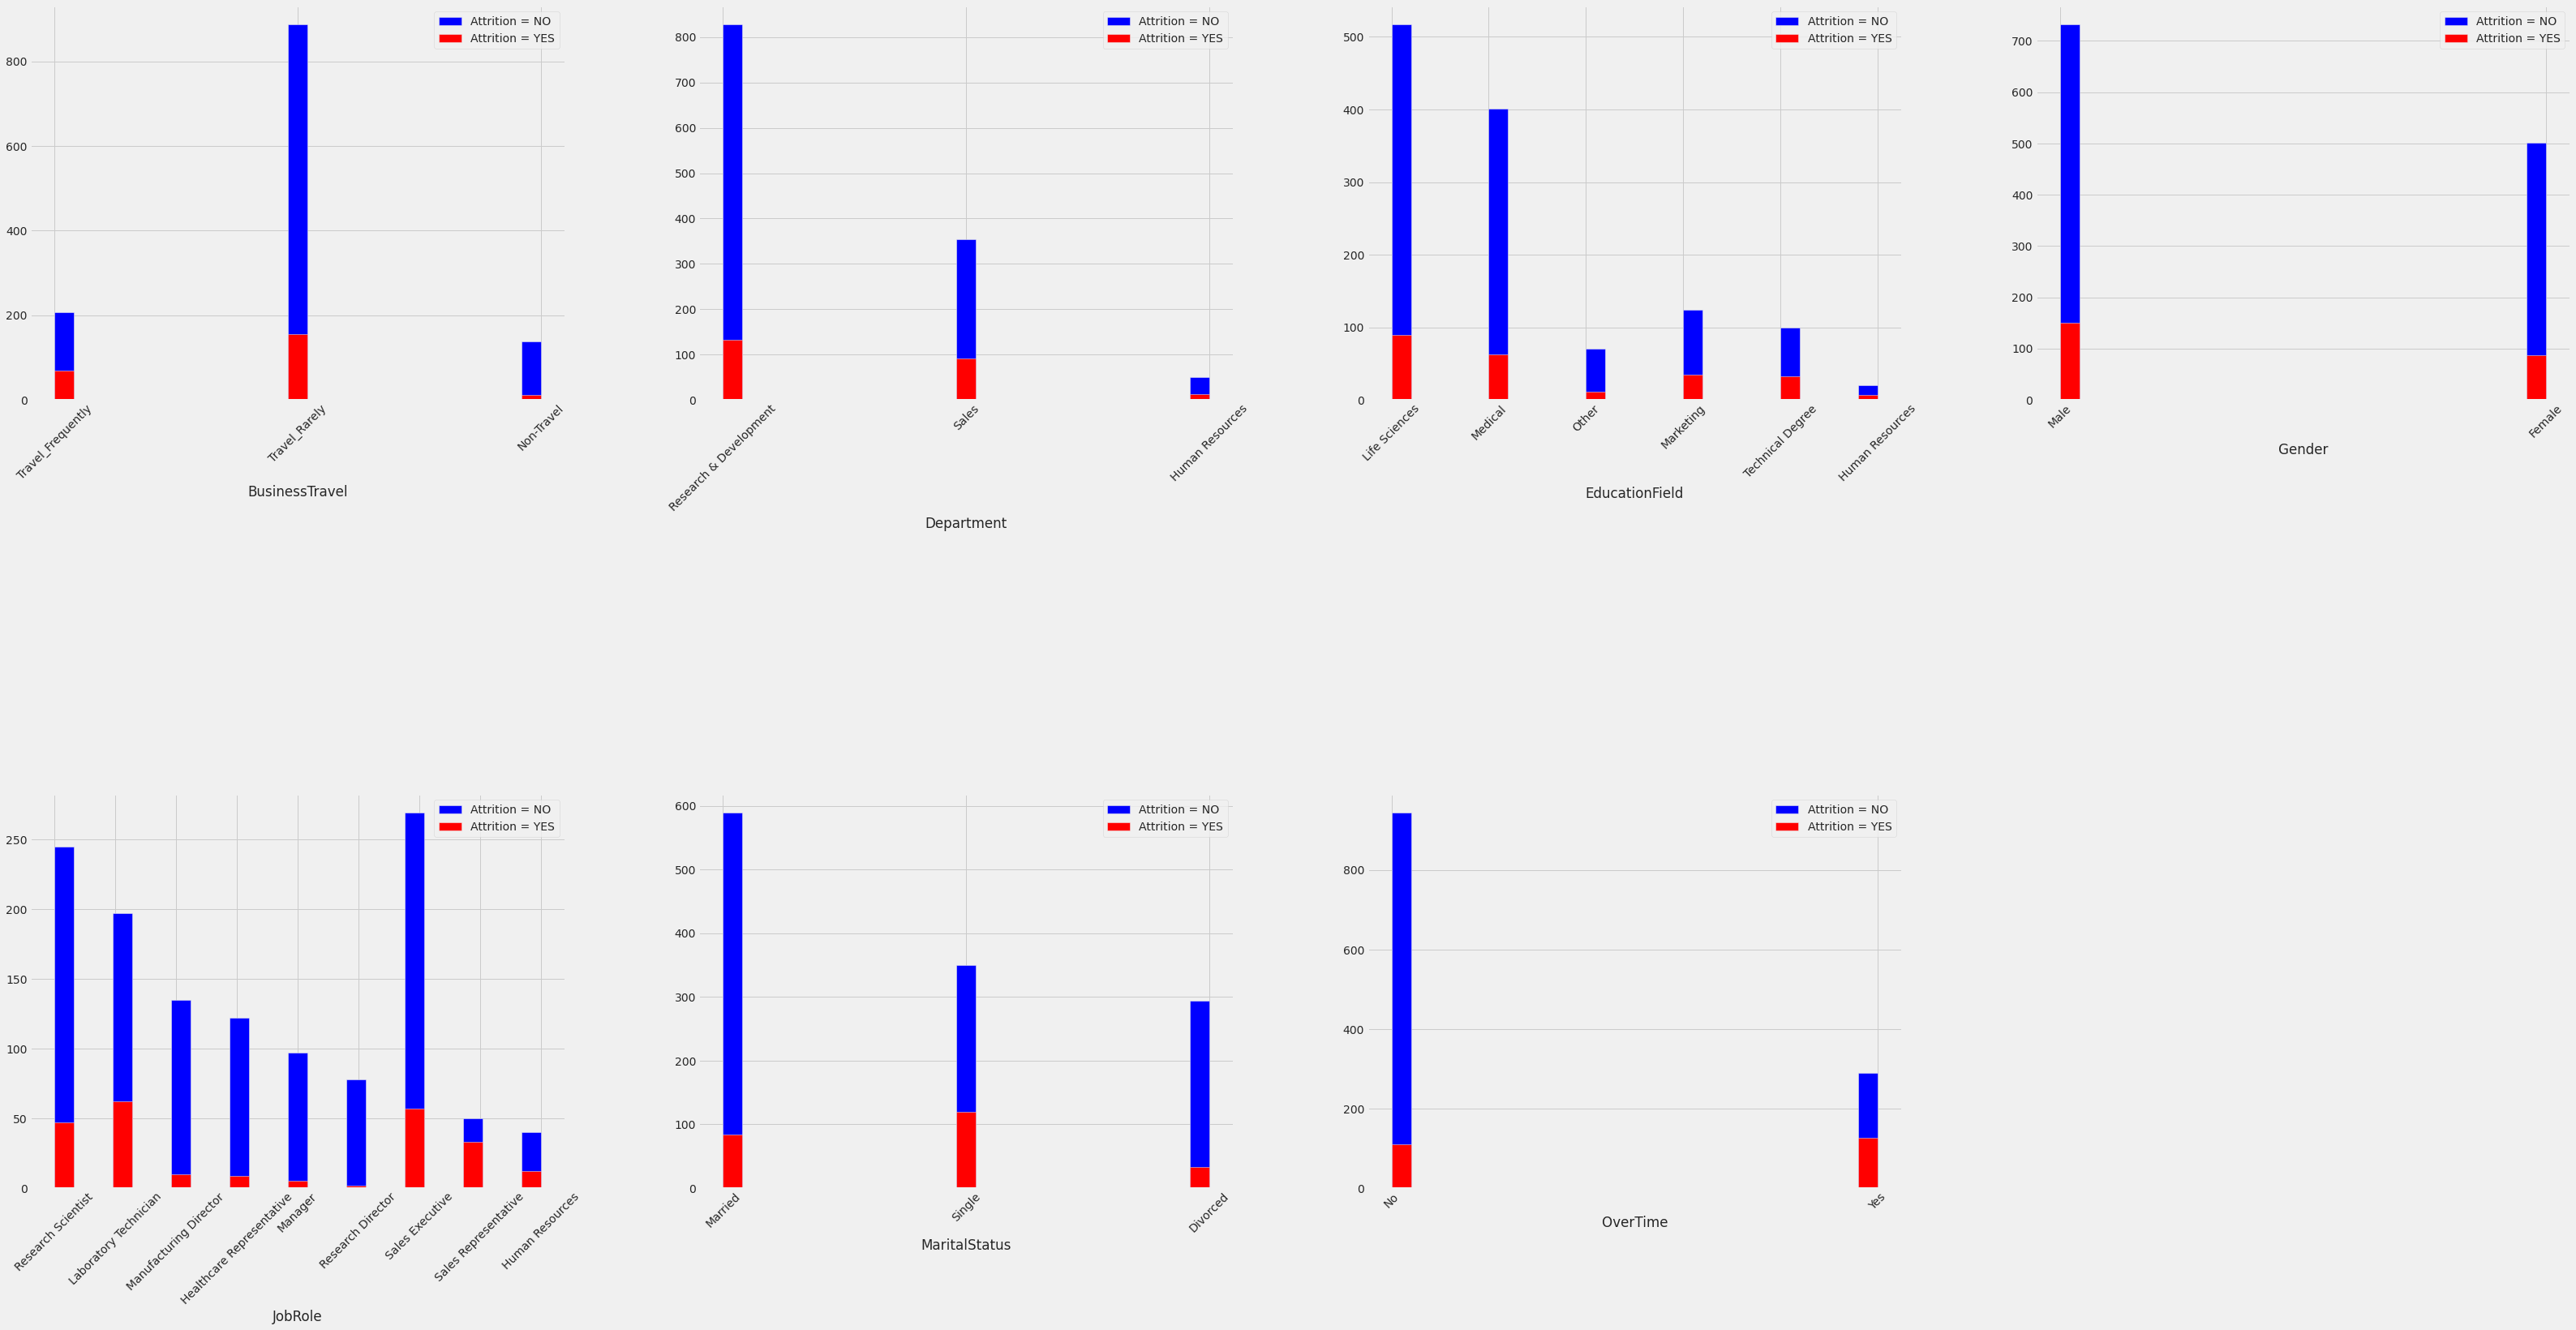

In [55]:
plt.figure(figsize=(50, 25))
for i, column in enumerate(categorical_features[1:], 1):
    plt.subplot(2, 4, i)
    dataset[dataset["Attrition"] == "No"][column].hist(bins=25, color='blue', label='Attrition = NO')
    dataset[dataset["Attrition"] == "Yes"][column].hist(bins=25, color='red', label='Attrition = YES')
    plt.xticks(rotation=45)
    plt.legend()
    plt.subplots_adjust(hspace=1,wspace=0.25) 
    plt.xlabel(column)

### analysis of numerical features

In [43]:
# discrete numerical features
cont_col = []
disc_col = []
for column in dataset.columns:
    if dataset[column].dtypes != object and dataset[column].nunique() > 25:
        cont_col.append(column)
    elif dataset[column].dtypes != object and dataset[column].nunique() <= 25:
        disc_col.append(column)

### relation beween attrition rate and numerical discrete features

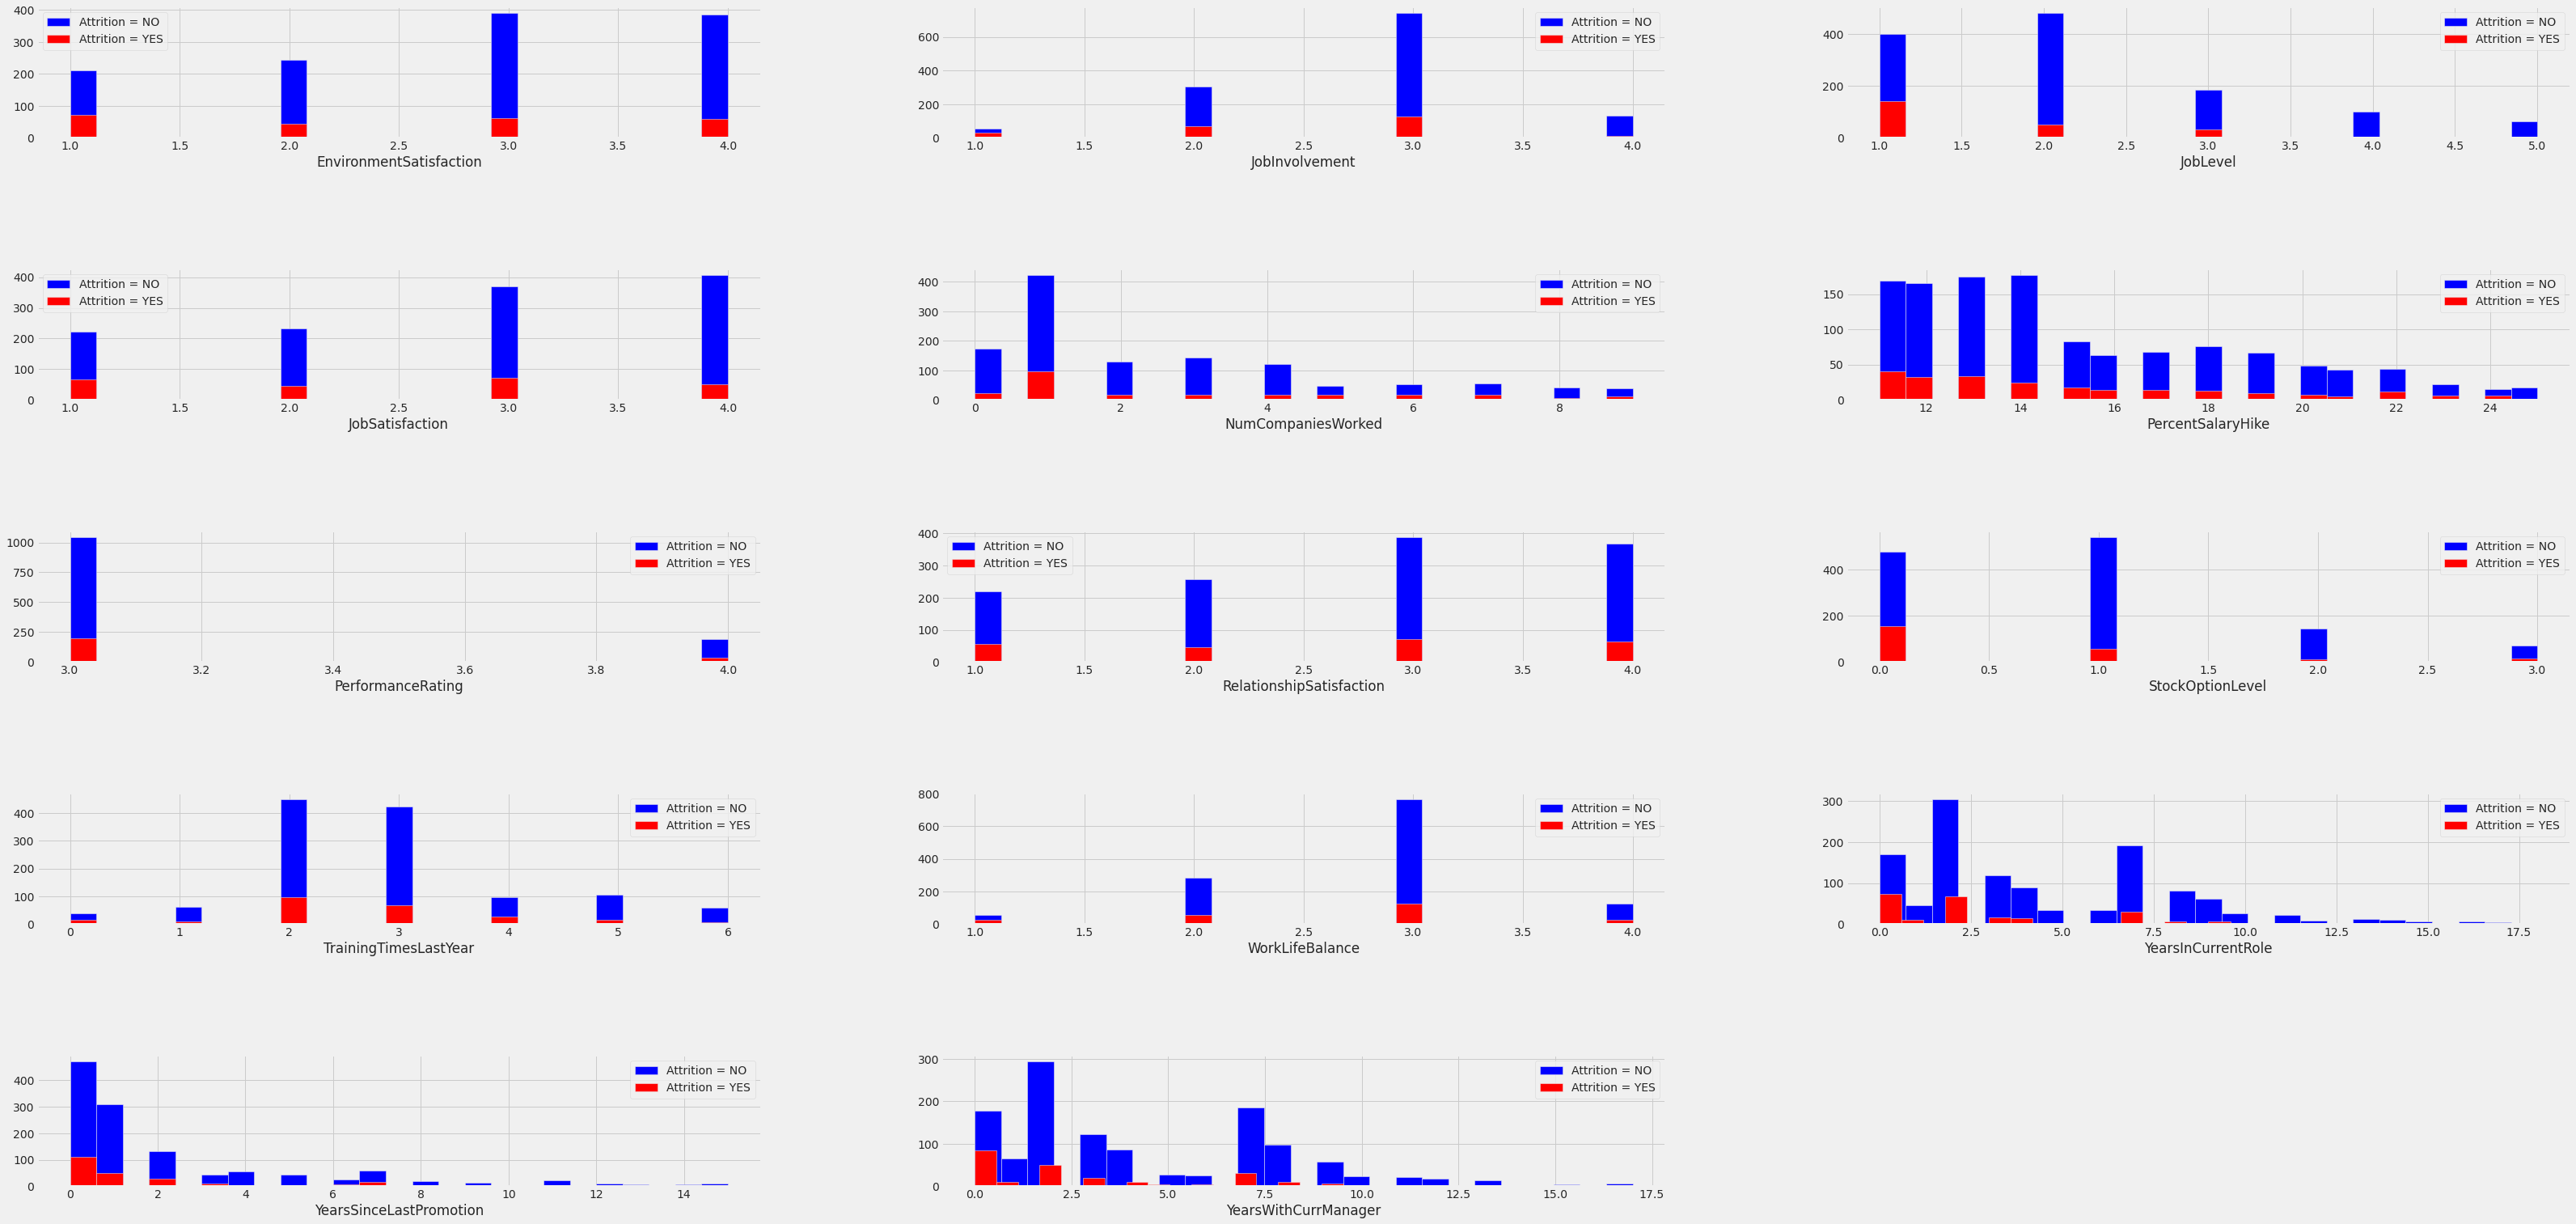

In [47]:
plt.figure(figsize=(50, 25))
for i, column in enumerate(disc_col[1:], 1):
    plt.subplot(5, 3, i)
    dataset[dataset["Attrition"] == "No"][column].hist(bins=25, color='blue', label='Attrition = NO')
    dataset[dataset["Attrition"] == "Yes"][column].hist(bins=25, color='red', label='Attrition = YES')
    plt.legend()
    plt.subplots_adjust(hspace=1,wspace=0.25) 
    plt.xlabel(column)

### relation beween attrition rate and numerical continious features

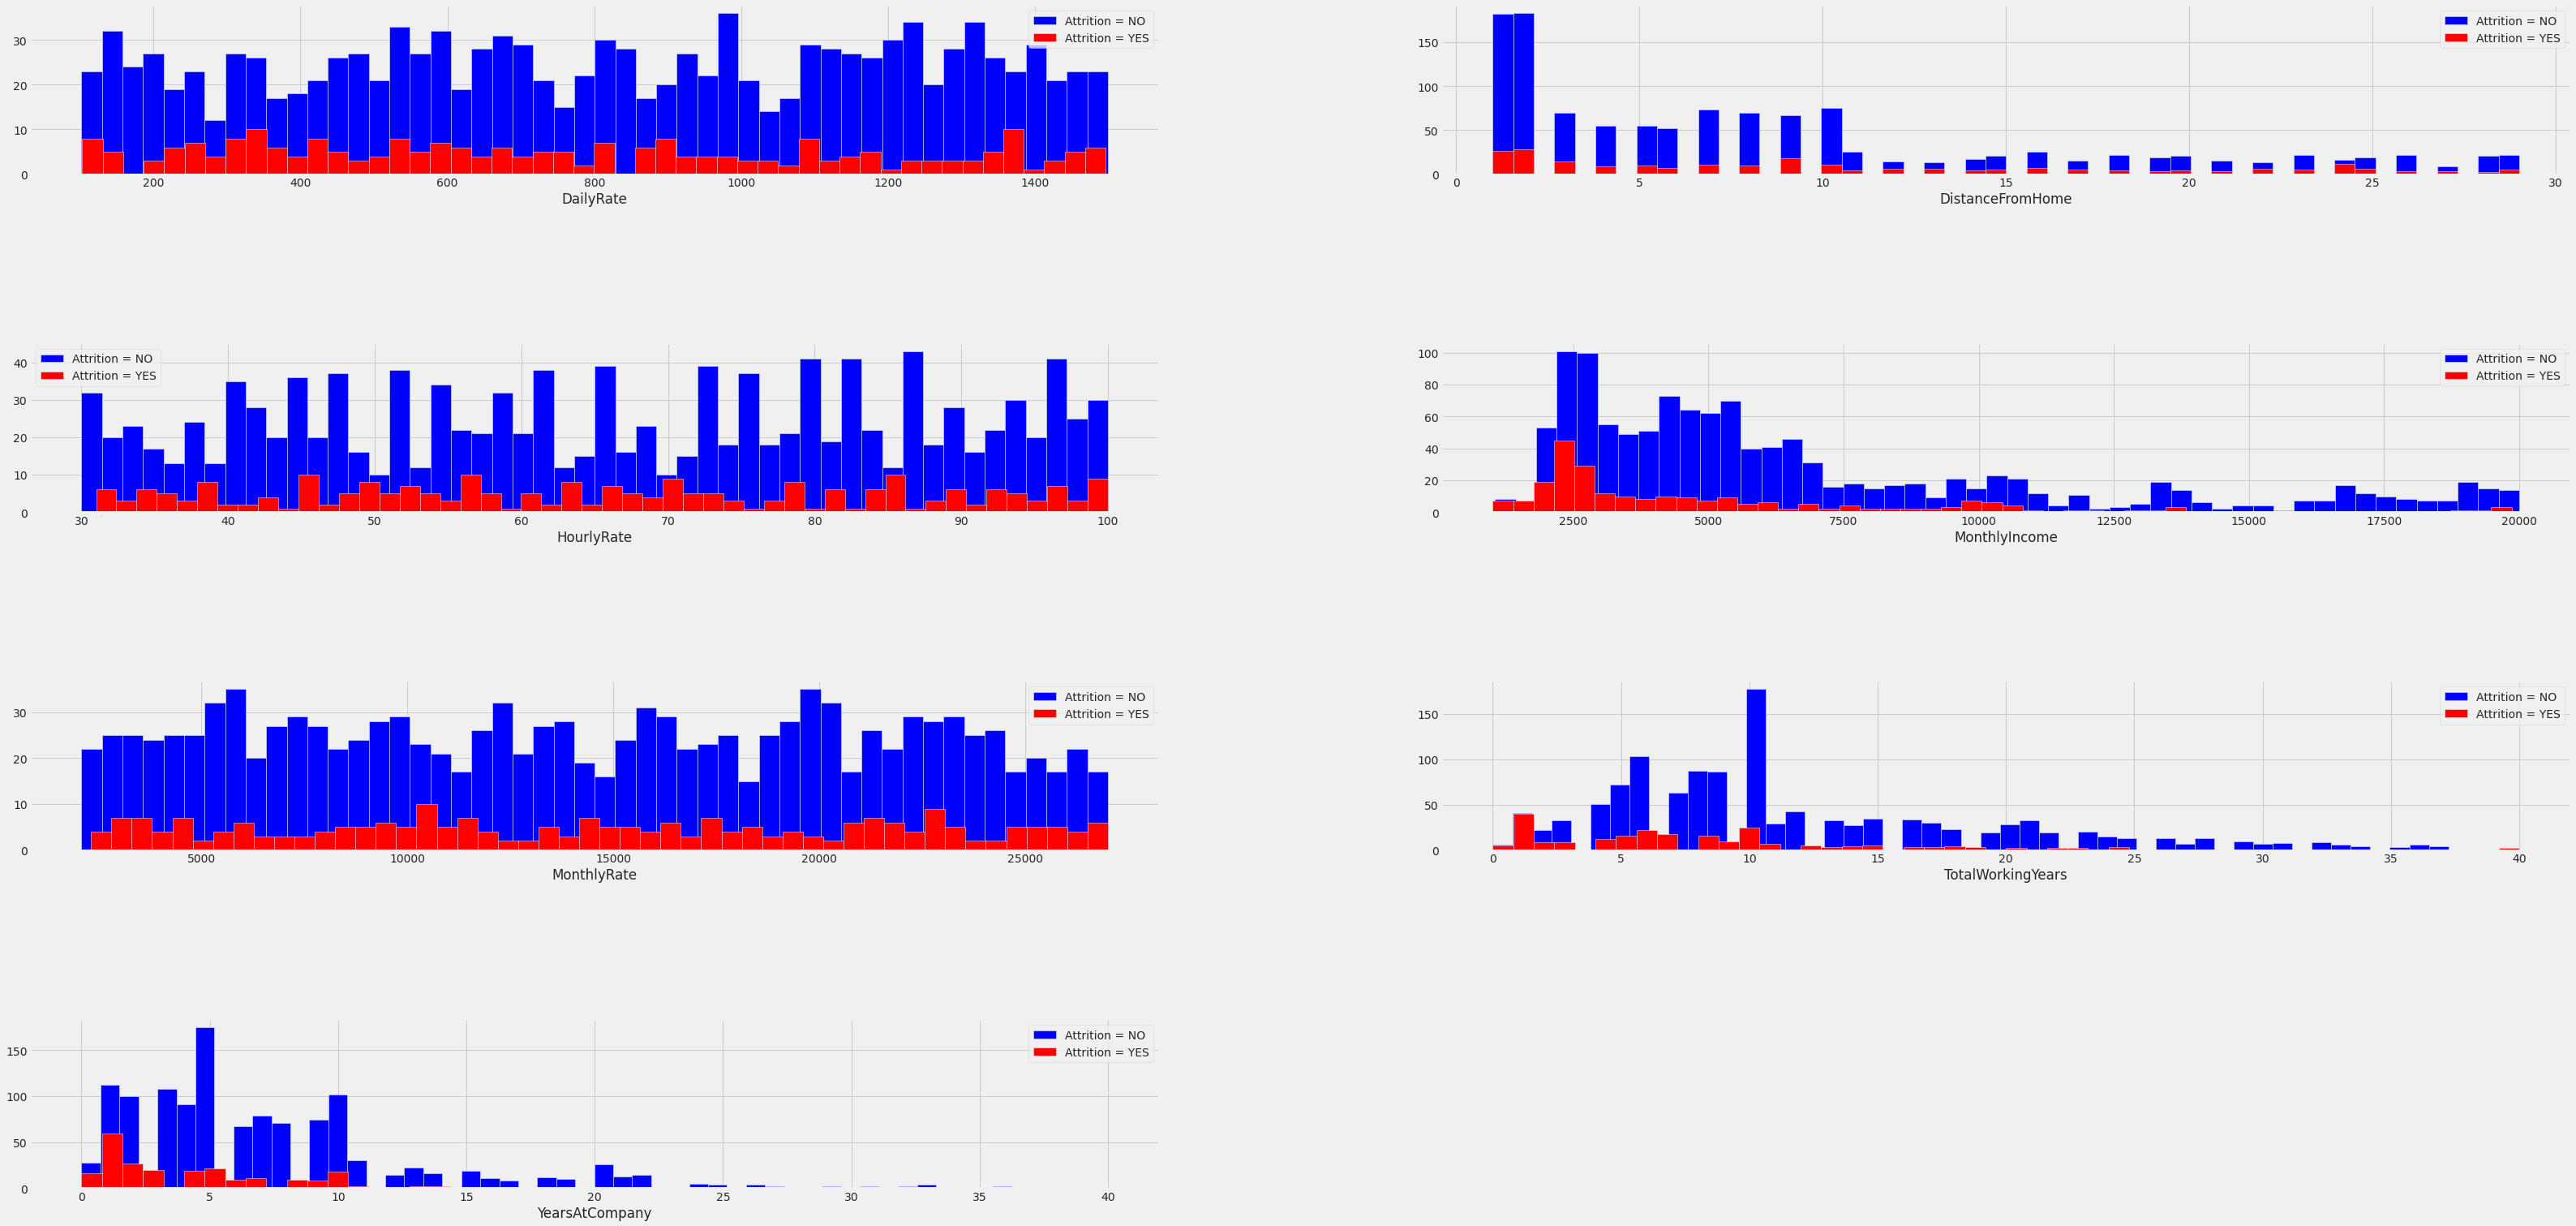

In [53]:
plt.figure(figsize=(50, 25))
for i, column in enumerate(cont_col[1:], 1):
    plt.subplot(4, 2, i)
    dataset[dataset["Attrition"] == "No"][column].hist(bins=50, color='blue', label='Attrition = NO')
    dataset[dataset["Attrition"] == "Yes"][column].hist(bins=50, color='red', label='Attrition = YES')
    plt.legend()
    plt.subplots_adjust(hspace=1,wspace=0.25) 
    plt.xlabel(column)

Conclusions:

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

### what is the correlation between all features

`what is correlation`

<img src='../../images/correlation-examples.svg'>

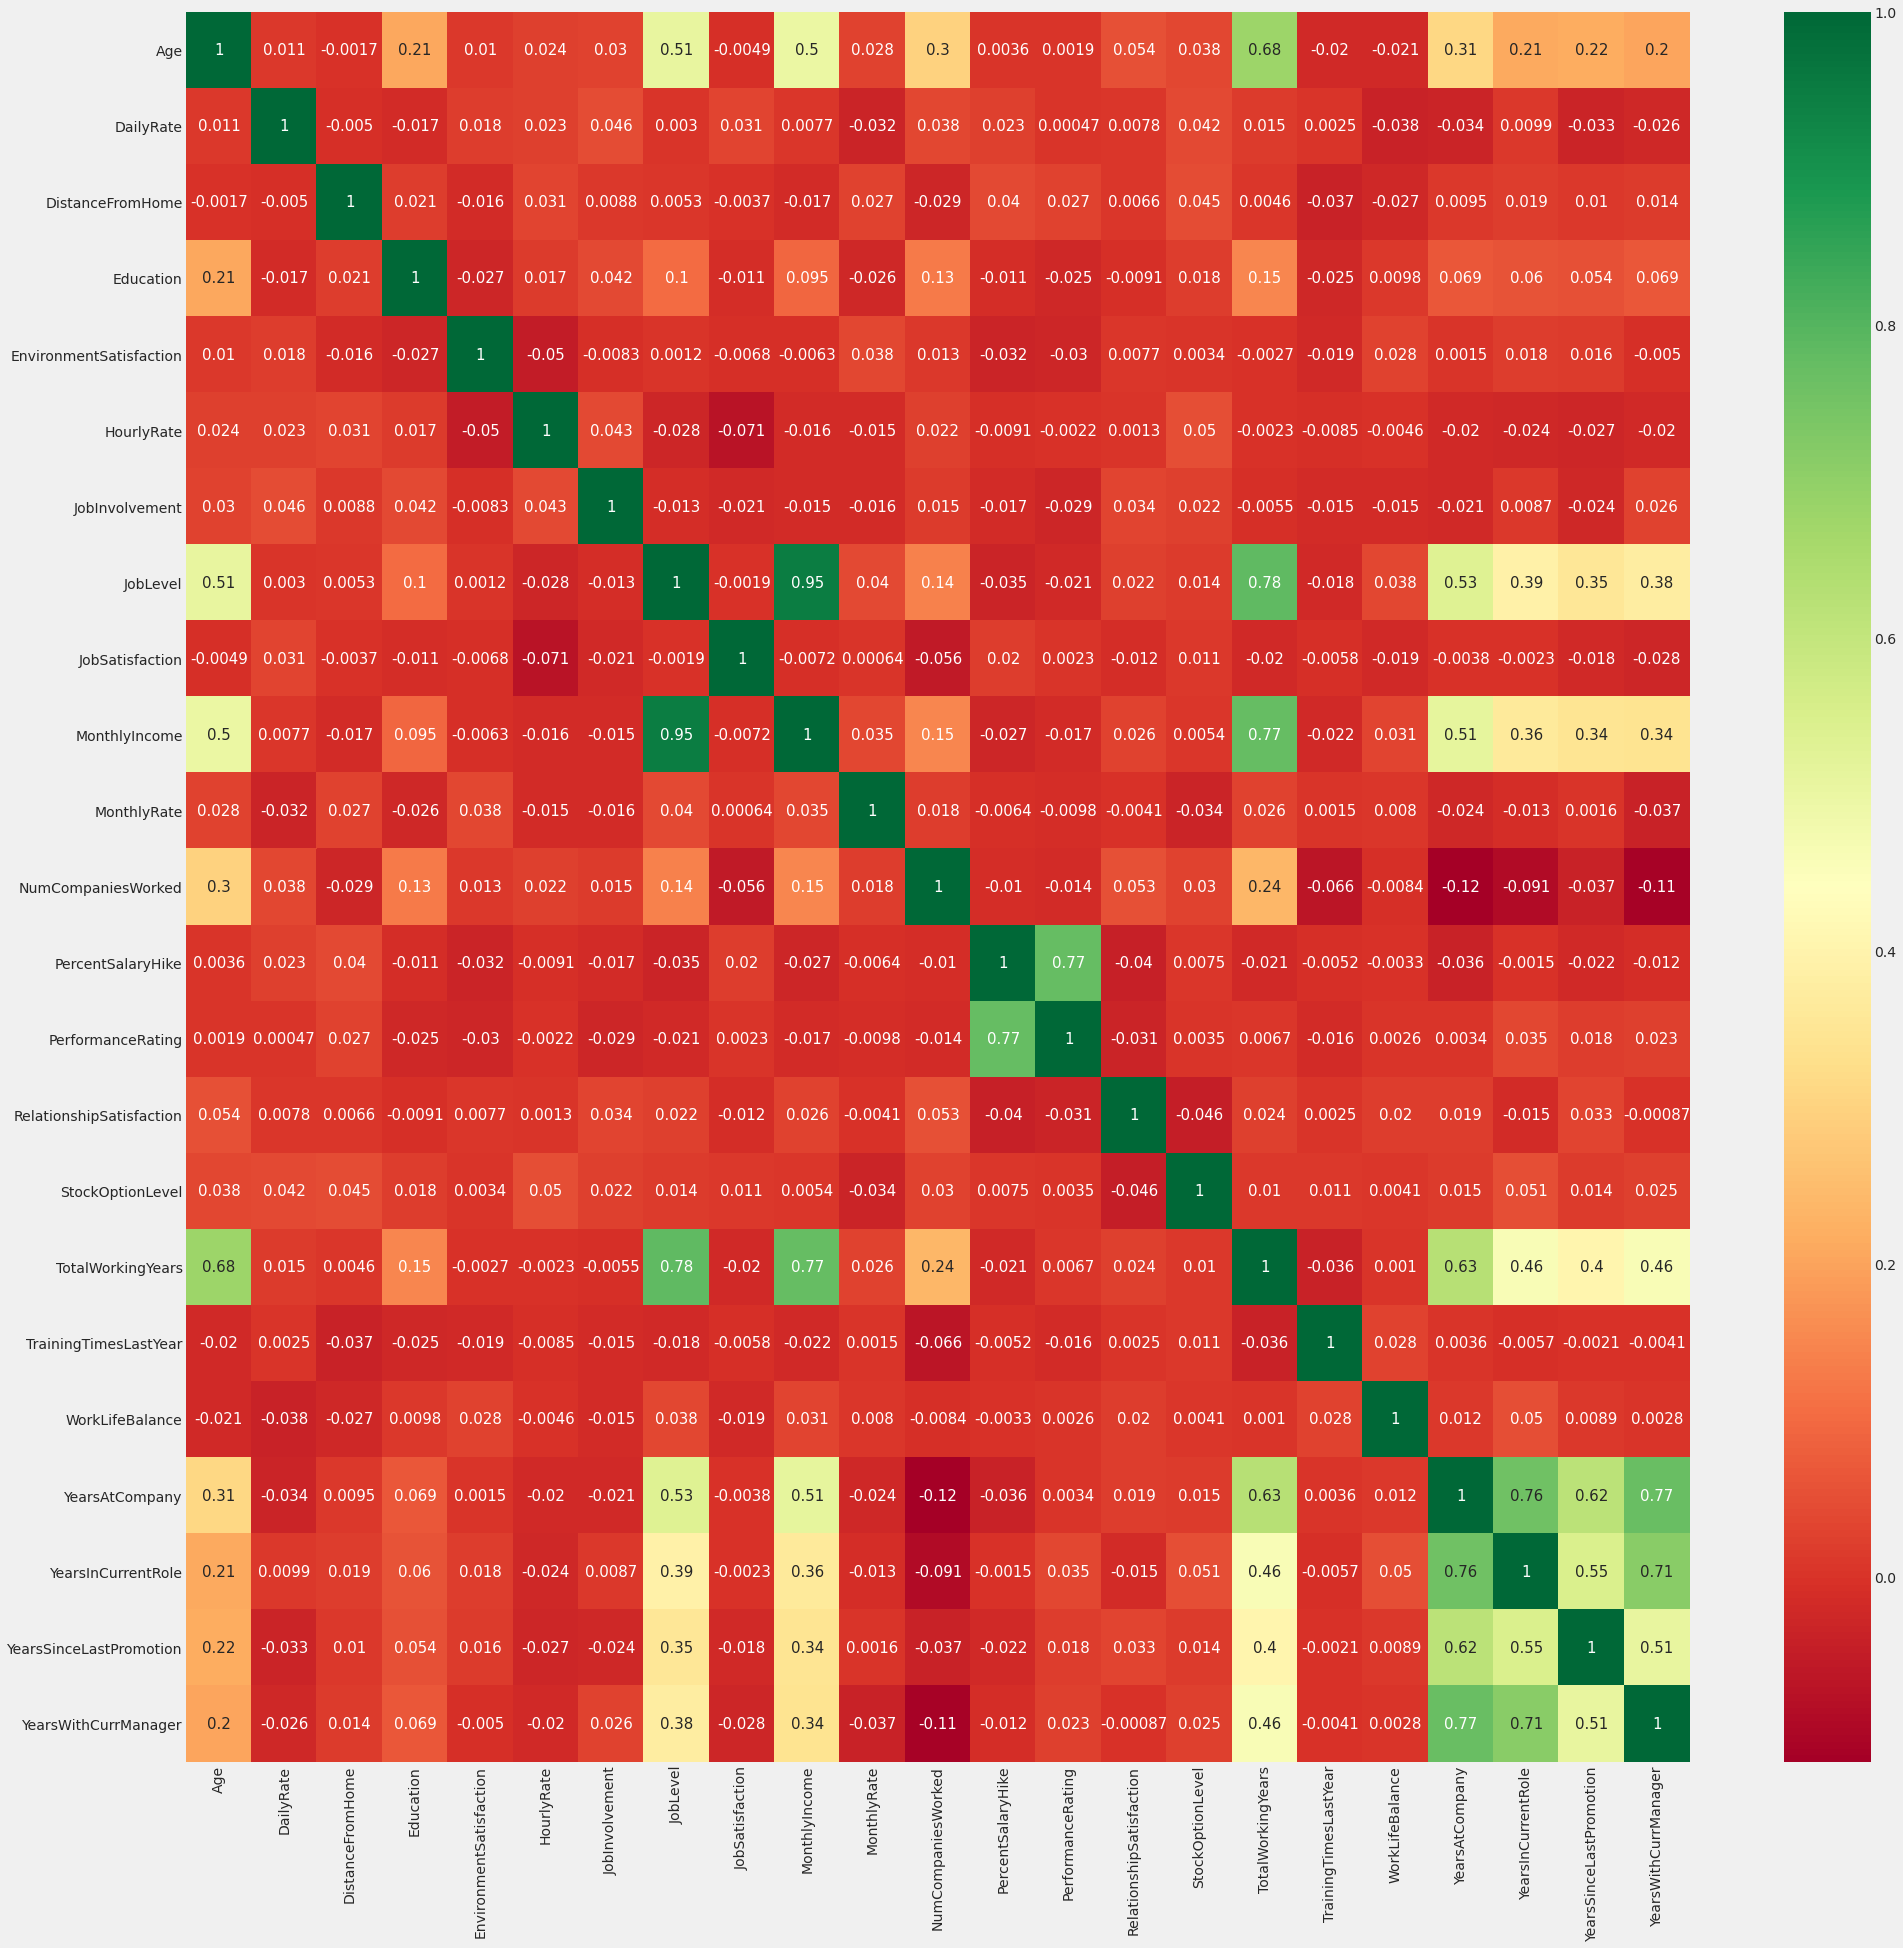

In [61]:
plt.figure(figsize=(30, 30))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})